# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

>**Tip**: Though it's not a mandate, students can attempt the classroom quizzes to ensure statistical numeric values are calculated correctly in many cases.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [150]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [151]:
ab_data = pd.read_csv('ab_data.csv')
ab_data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [152]:
#Number of rows in dataset
print('Total number of rows: {}'.format(ab_data['user_id'].count()))

Total number of rows: 294478


**c.** The number of unique users in the dataset.

In [153]:
#Number of Unique Users in dataset
print('Number of unique users: {}'.format(ab_data['user_id'].nunique()))

Number of unique users: 290584


**d.** The proportion of users converted.

In [154]:
#First we get the users converted and then calculate the propotion
users_converted= ab_data.query('converted == 1')['user_id']
print('Proportion of users converted: {}'.format(users_converted.shape[0]/ab_data.shape[0]))

Proportion of users converted: 0.11965919355605512


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [155]:
#Number of users who were mismatced
# treatment group mismatced with old_page or control group mismatched with new_page 
tr_grp_page= ab_data.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')
print('Number of times when group is treatment but landing_page is not a new_page: {}'.format(tr_grp_page['user_id'].count()))

Number of times when group is treatment but landing_page is not a new_page: 3893


**f.** Do any of the rows have missing values?

In [156]:
#check any missing value for mismatched users
print('Number of missing values: {}'.format(tr_grp_page.isnull().values.any()))

Number of missing values: False


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [157]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
# Remove users who were mismatced 
tr_page = '(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")'
cont_page = '(group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")'
mismatched= tr_page+' or '+cont_page
df2= ab_data.drop(ab_data.query(mismatched).index)
df2.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [158]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [159]:
#Number of unique users in the new df2
df2['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [160]:
#Check the duplicated users in df2
dup_user = df2[df2['user_id'].duplicated()]
dup_user

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [161]:
#Full information about duplicated user in df2, which has id = 773192
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [162]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates()() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop_duplicates('user_id', keep='last', inplace=True)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [163]:
#probability that user converted regardless of the page they received
convert_usr = df2.query('converted == 1')['user_id']
convert_prob = convert_usr.count()/df2['user_id'].count()
print("Prob of users converted regardless of the page {}".format(convert_prob))

Prob of users converted regardless of the page 0.11959708724499628


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [164]:
#probability that user converted in control group
convert_usr_cont = df2.query('converted == 1 and group == "control"')['user_id']
usr_cont= df2.query('group == "control"')['user_id']
convert_prob_cont = convert_usr_cont.count()/usr_cont.count()
print("Prob of users converted in control group {}".format(convert_prob_cont))

Prob of users converted in control group 0.1203863045004612


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [165]:
#probability that user converted in treatment group
convert_usr_tr = df2.query('converted == 1 and group == "treatment"')['user_id']
usr_tr= df2.query('group == "treatment"')['user_id']
convert_prob_tr = convert_usr_tr.count()/usr_tr.count()
print("Prob of users converted in treatment group {}".format(convert_prob_tr))

Prob of users converted in treatment group 0.11880806551510564


>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [166]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = convert_prob_tr - convert_prob_cont
print("Actual difference {}".format(obs_diff))

Actual difference -0.0015782389853555567


**d.** What is the probability that an individual received the new page?

In [167]:
#probability that user received the new page
new_page_usr = df2.query('landing_page == "new_page"')['user_id']
new_page_prob = new_page_usr.count()/df2['user_id'].count()
print("Prob of users received the new page {}".format(new_page_prob))

Prob of users received the new page 0.5000619442226688


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

The probability of an individual converting regardless of the page they receive is 11.96%.
Given that the individual was in the control group, the probability they converted is 12.04%.
Given that the individual was in the treatment group, the probability they converted is 11.88%.
The above three probabilities are similar to each other. therefore, there is no proof that new page will praticpate in getting more conversions.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

H0: p_new - p_old <= 0  
H1: p_new - p_old > 0 

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [168]:
# new converted rate equals to the converted rate regardless of page
pnew = convert_prob
print("New converted rate: {}".format(pnew))

New converted rate: 0.11959708724499628


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [169]:
# old converted rate equals to the converted rate regardless of page
pold= convert_prob
print("Old converted rate: {}".format(pold))
# convert_prob_cont, convert_prob_tr

Old converted rate: 0.11959708724499628


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [170]:
#number of individuals in the treatment group
n_new = df2.query('group == "treatment"')['user_id'].nunique()
print("Number of individuals in the treatment group: {}".format(n_new)) 

Number of individuals in the treatment group: 145310


**d.** What is $n_{old}$, the number of individuals in the control group?

In [171]:
#number of individuals in the control group
n_old = df2.query('group == "control"')['user_id'].nunique()
print("Number of individuals in the control group: {}".format(n_old)) 

Number of individuals in the control group: 145274


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [172]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([1,0], size= n_new ,p= [pnew, 1-pnew])
new_page_converted.mean()

0.88012524946665749

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [173]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([1,0], size= n_old ,p= [pold, 1-pold])
old_page_converted.mean()

0.88135523218194589

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [174]:
p_diff_simulat= new_page_converted.mean() - old_page_converted.mean()
print("Converted p_new - p_old: {}".format(p_diff_simulat)) 

Converted p_new - p_old: -0.0012299827152884024



**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [175]:
# Sampling distribution 
import time
p_diffs = []

start_time=time.time()

new_page_converted = np.random.binomial(n_new,pnew,10000)/n_new
old_page_converted = np.random.binomial(n_old,pold,10000)/n_old
p_diffs = new_page_converted - old_page_converted 

#for _ in range(10000):
#    new_page_converted = np.random.choice([0,1],n_new, p=(pnew,1-pnew))
#    old_page_converted = np.random.choice([0,1],n_old, p=(pold,1-pold))
#    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

v_time=time.time()-start_time
print(f"Vectorized time taken: {v_time} seconds")


Vectorized time taken: 0.003662109375 seconds


**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

>**Tip**: Display title, x-label, and y-label in the chart.

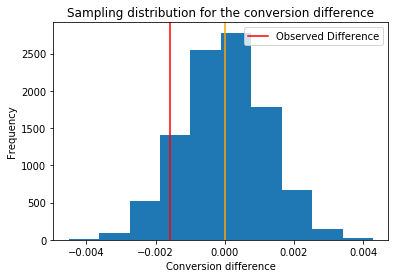

In [176]:
#Distribution under null hypothesis
p_diffs=np.array(p_diffs)
# simulated a sampling distribution for the conversion difference 
plt.hist(p_diffs);
plt.axvline(x=0, color='orange');
plt.title("Sampling distribution for the conversion difference")
plt.xlabel('Conversion difference');
plt.ylabel('Frequency');
plt.axvline(x=obs_diff,color ='red', label='Observed Difference');
plt.legend();

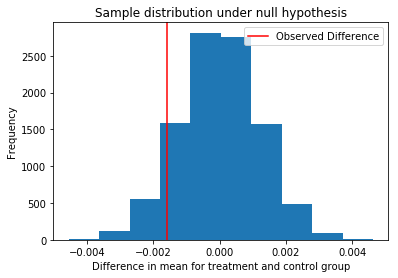

In [177]:
#Plot histogram of distribution under null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals);
plt.title("Sample distribution under null hypothesis");
plt.xlabel('Difference in mean for treatment and control group');
plt.ylabel('Frequency');
#Plot vertical line for observed statistic
plt.axvline(x=obs_diff,color ='red', label='Observed Difference');
plt.legend();

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [178]:
#Proportion of p_diffs are greater than actual difference observed 
print("Proportion of p_diffs are greater than the actual difference observed (p_value): {}".format((null_vals > obs_diff).mean()))

Proportion of p_diffs are greater than the actual difference observed (p_value): 0.9041


In [179]:
#Proportion of p_diffs are greater than actual difference observed 
print("Proportion of p_diffs are greater than the actual difference observed: {}".format((p_diffs > obs_diff).mean()))

Proportion of p_diffs are greater than the actual difference observed: 0.9028


**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

The calculated p-value from bootstrap sample with a value of 0.9 which is larger than apla value of 0.05, means we fail to reject the null hypotheses. In addition to, the difference in convertion rate for new page and old page is negative and is not statistically significant concluding that the old page has higher probablity of convert rate than new page. Therefore, the old page is statistically favored and is better than the new one.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [180]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = convert_usr_cont.count()

# number of conversions with the new_page
convert_new = convert_usr_tr.count()

# number of individuals who were shown the old_page
n_old = usr_cont.count()

# number of individuals who received new_page
n_new = usr_tr.count()
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [181]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
count_array = np.array([convert_new, convert_old])
nobs_array = np.array([n_new, n_old])
z_score, p_value = sm.stats.proportions_ztest(count_array, nobs_array, alternative = 'larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

We fail to reject the null hypothesis that old page users is better or equal converted rate than old page users because z-score of 1.31092419842 does not exceed the critical value of 1.960. The converted rate for new page and old page have no difference. This result is the same as parts J. and K. result.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

Multi Linear regression would be used because the response is categorical variable. It is a multiple regression but with an outcome variable that is a categorical variable.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [182]:
#create the intercept column
df2['intercept'] = 1
#create dummy variable column and add it to df2 as ab_page
df2['ab_page'] = pd.get_dummies(df2['group']) ['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [183]:
#apply logistic regression model
log_mod =sm.Logit(df2['converted'],df2[['intercept', 'ab_page']])
#fit the model
result = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [184]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
#get summary statistics
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2023-01-10 05:19 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


The p-value associated with ab_page is 0.190 which is larger than type I error threshold of 0.05, thus the null hypothesis cannot be rejected. The negative coefficient of ab_page is therefore insignificant, so we cannot say that the new page has any 
effect on the conversion rate. The new page didn't lead to more conversions, therefore we keep the old page.

This conclusion is the same as the previous part, however the p-value differs from the value found in Part II due to different hypotheses being tested in the two parts. In the previous part we did one-tailed test, in which the alternative was that the new page has higher conversions.  

In this part, we are doing a two-tailed test, so the alternative is that the new page has a different conversion rate than the old page and the null hypothesis of logistic regression that the probability of conversion is the same with the old page and the new page. It would fit the alternative hypothesis and this is why the p-value decreased proven by negative observed difference if the new page actually isn't better than the old page.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Timestamp could be another factor to be added into your regression model as categorical variable including "AM, PM", or "weekday and weekend". Checking if the converted rate depends on certain time of the day or certain day could really be play a good part in predication.
Disadavantage is that it will make the model more complex, we could add higher order term for predicating better result.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [185]:
# Read the countries.csv
co_data = pd.read_csv('countries.csv')
co_data.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [186]:
# Join with the df2 dataframe
df2_co = df2.merge(co_data, on ='user_id', how='left')
df2_co.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [187]:
# Create the necessary dummy variables
df2_co[['CA','UK','US']] = pd.get_dummies(df2_co['country'])
df2_co.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1


In [188]:
#drop 'CA' Column
df2_co=df2_co.drop('CA', axis=1)
df2_co.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1


In [189]:
#apply logistic regression model
log_mod2 =sm.Logit(df2_co['converted'], df2_co[['intercept','ab_page','UK','US']])

#fit the model
result2 = log_mod2.fit()

#get summary statistics
result2.summary2() 

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2023-01-10 05:19 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

Adding ab_page to the model makes no difference and we fail to reject the null hypothesis because all variables are still insignificant.

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Tip**: Conclusions should include both statistical reasoning, and practical reasoning for the situation. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [190]:
UK_inter = df2_co['ab_page'] * df2_co['UK']
df2_co['UK_inter'] = UK_inter

In [191]:
US_inter = df2_co['ab_page'] * df2_co['US']
df2_co['US_inter'] = US_inter
df2_co.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,UK_inter,US_inter
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,0,0


In [192]:
# Fit your model, and summarize the results

#apply logistic regression model
log_mod3 =sm.Logit(df2_co['converted'], df2_co[['intercept', 'UK', 'US', 'UK_inter', 'US_inter']])

#fit the model
result3 = log_mod3.fit()

#get summary statistics
result3.summary2() 

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.3422
Date:               2023-01-10 05:19 BIC:              212835.2404
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           4                LL-Null:          -1.0639e+05
Df Residuals:       290579           LLR p-value:      0.22052    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0453    0.0306    1.4806  0.1387  -0.0147   0.1053
US             0.0511    0.0277    1.8414  0.0656  -0.0033   0.1054
UK_inter       0.0108    0.0228    0.4749  0.6349  -0.0339   0.0555
US_inter      -0.0206    0.0137   -1.5052  0.1323  -0.0473   0.0062
==================================================================

"""

In [193]:
# Fit your model, and summarize the results
log_mod4 = sm.Logit(df2_co['converted'], df2_co[['intercept', 'ab_page', 'UK', 'US', 'UK_inter', 'US_inter']])
result4 = log_mod4.fit()
result4.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2023-01-10 05:19 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK_inter       0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
US_inter       0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

A several model tests are performed for the new page increases conversions. The conclusion is that the new page did not prove to be better than the old page and we do not have the proof to convert to the new page. This confirms previous conclusions, which is that we do not have evidence to reject the null and the old page should be kept.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [194]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0